# Exploratory Data Analysis of US election

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [58]:
#import excel file as a dataframe
data= pd.read_excel('improvised_data_train.xlsx')
data.head(4)

,Gender,Age,Income,Region,PartyID,Ideology,Vote Intention,Attention to election
0,Male,45-65,Under $50K,West,Democratic,Liberal,Trump,A lot
1,Male,65+,$50-100K,West,Independent,Modern Liberal,Trump,A lot
2,Male,30-44,Under $50K,Midwest,Democratic,Conservative,Trump,A lot
3,Male,30-44,Under $50K,Northeast,Democratic,Liberal,Biden,A lot


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 1199 non-null   object
 1   Age                    1199 non-null   object
 2   Income                 1199 non-null   object
 3   Region                 1199 non-null   object
 4   PartyID                1199 non-null   object
 5   Ideology               1199 non-null   object
 6   Vote Intention         1199 non-null   object
 7   Attention to election  1199 non-null   object
dtypes: object(8)
memory usage: 75.1+ KB


In [60]:
data.describe()

,Gender,Age,Income,Region,PartyID,Ideology,Vote Intention,Attention to election
count,1199,1199,1199,1199,1199,1199,1199,1199
unique,2,4,3,4,3,3,3,3
top,Male,45-65,Under $50K,South,Democratic,Conservative,Biden,A lot
freq,683,506,510,469,434,444,611,1018


In [61]:
data.isnull().sum()

Gender                   0
Age                      0
Income                   0
Region                   0
PartyID                  0
Ideology                 0
Vote Intention           0
Attention to election    0
dtype: int64

In [62]:
data.columns

Index(['Gender', 'Age', 'Income', 'Region', 'PartyID', 'Ideology',
       'Vote Intention', 'Attention to election'],
      dtype='object')

In [63]:
data.Gender.value_counts()

Male      683
Female    516
Name: Gender, dtype: int64

In [64]:
data.Age.value_counts()

45-65    506
65+      312
30-44    242
18-29    139
Name: Age, dtype: int64

In [65]:
data.Income.value_counts()

Under $50K       510
$50-100K         414
$100K or more    275
Name: Income, dtype: int64

In [66]:
data.Income.value_counts()

Under $50K       510
$50-100K         414
$100K or more    275
Name: Income, dtype: int64

In [67]:
data.PartyID.value_counts()

Democratic     434
Independent    431
Republican     334
Name: PartyID, dtype: int64

In [68]:
data.Ideology.value_counts()

Conservative      444
Liberal           383
Modern Liberal    372
Name: Ideology, dtype: int64

In [69]:
data['Vote Intention'].value_counts()

Biden    611
Trump    514
Other     74
Name: Vote Intention, dtype: int64

In [70]:
data['Attention to election'].value_counts()

A lot            1018
Some              119
Only a little      62
Name: Attention to election, dtype: int64

# Relationship between gender and voting intention


Gender  Vote Intention
Female  Biden             265
        Trump             220
        Other              31
Male    Biden             346
        Trump             294
        Other              43
Name: Vote Intention, dtype: int64


<AxesSubplot:ylabel='Vote Intention'>

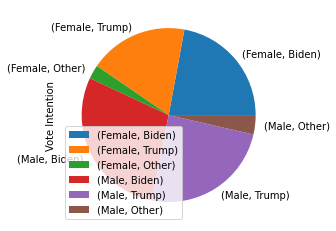

In [71]:
Gender_vote_intent = data.groupby('Gender')['Vote Intention'].value_counts()
print(Gender_vote_intent)
Gender_vote_intent.plot(kind='pie',legend =True)

In [77]:
Gender_vote_age = data.groupby(['Age','Gender'])['Vote Intention'].value_counts()
Gender_vote_age

Age    Gender  Vote Intention
18-29  Female  Biden              33
               Trump              30
               Other               4
       Male    Trump              41
               Biden              25
               Other               6
30-44  Female  Biden              54
               Trump              49
               Other               4
       Male    Biden              71
               Trump              58
               Other               6
45-65  Female  Biden             103
               Trump              90
               Other              18
       Male    Biden             155
               Trump             119
               Other              21
65+    Female  Biden              75
               Trump              51
               Other               5
       Male    Biden              95
               Trump              76
               Other              10
Name: Vote Intention, dtype: int64

<AxesSubplot:xlabel='Age,Gender'>

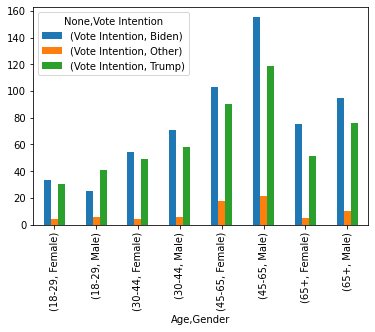

In [80]:
df2=pd.DataFrame(Gender_vote_age)
df2.unstack().plot(kind='bar',legend=True)